In [17]:
%%capture 
!pip install scikit-multilearn
!pip install neattext
#!pip install nltk
#!pip install matplotlib


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import neattext as nt
import neattext.functions as nfx
from neattext.functions import clean_text 

In [ ]:
from google.colab import files
uploaded = files.upload()
# not using this but this is an alternative way of importing data

In [ ]:
import csv
url = 'https://raw.githubusercontent.com/AlexWang18/data/main/professors.csv'
profs = pd.read_csv(url, skip_blank_lines=True, encoding="ISO-8859-1")
profs.head()

,id,rating,name,would_take_again,level_of_difficulty,department,url,tag0,tag1,tag2,tag3,tag4
0,1b381a70-ba04-11ed-b771-a4c3f0856cc6,2.3,Brenda Berrian,NaN,3.3,English Department,https://www.ratemyprofessors.com/professor?tid...,NaN,NaN,NaN,NaN,NaN
1,1bfaf708-ba04-11ed-b4e7-a4c3f0856cc6,4.8,Aaron Bernstine,100%,1.8,Business Administration Department,https://www.ratemyprofessors.com/professor?tid...,Gives good feedback,Respected,Inspirational,Hilarious,Caring
2,1d0251de-ba04-11ed-8159-a4c3f0856cc6,4.3,Aarti Madan,NaN,3.1,Spanish Department,https://www.ratemyprofessors.com/professor?tid...,NaN,NaN,NaN,NaN,NaN
3,1d31c636-ba04-11ed-a3e8-a4c3f0856cc6,1.6,Abel Franco,0%,4.6,Philosophy Department,https://www.ratemyprofessors.com/professor?tid...,Tough grader,Lots of homework,Get ready to read,So many papers,NaN
4,1d672e1a-ba04-11ed-9f19-a4c3f0856cc6,1.6,Adam Hobaugh,25%,4.4,Computer Science Department,https://www.ratemyprofessors.com/professor?tid...,Tough grader,Graded by few things,Lots of homework,Caring,NaN


In [125]:
url = 'https://raw.githubusercontent.com/sim1029/choose-my-professor/2a2890488e260b17bb8581e3c076e12aab84a707/reviewsISH.csv'
reviews = pd.read_csv(url, skip_blank_lines=True, encoding="ISO_8859-1")
reviews.head(5)

,id,prof_id,emotion,comment,timestamp,course,thumbs_up,thumbs_down,quality,difficulty,...,meta_item1,meta_item2,meta_item3,meta_item4,meta_item5,tag0,tag1,tag2,tag3,tag4
0,1b3d723a-ba04-11ed-8681-a4c3f0856cc6,1b381a70-ba04-11ed-b771-a4c3f0856cc6,awful,Worst professor I have ever had. Does not list...,"Apr 6th, 2014",AFR0242,0.0,0.0,1.0,5.0,...,Grade: A,Textbook: No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1b3e5c10-ba04-11ed-bf24-a4c3f0856cc6,1b381a70-ba04-11ed-b771-a4c3f0856cc6,awful,Professor Berrian refuses to hear anyone's opi...,"Mar 4th, 2014",AFRCNA1655,1.0,0.0,1.5,3.0,...,Grade: Not_Sure_Yet,Textbook: No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1b3f1f68-ba04-11ed-805a-a4c3f0856cc6,1b381a70-ba04-11ed-b771-a4c3f0856cc6,awesome,"At first I was skeptical about her, but she is...","Dec 20th, 2012",AFRCN1644,0.0,0.0,4.5,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1b3f9482-ba04-11ed-930b-a4c3f0856cc6,1b381a70-ba04-11ed-b771-a4c3f0856cc6,average,Class content was interesting. She is my least...,"Oct 2nd, 2012",WSP0242,0.0,0.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1b4030de-ba04-11ed-a97a-a4c3f0856cc6,1b381a70-ba04-11ed-b771-a4c3f0856cc6,average,I was very hesitant to take this class after r...,"Nov 15th, 2011",AFRCN0242,0.0,0.0,3.5,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
reviews['course'].nunique()

6064

In [7]:
reviews['prof_id'].nunique()

1192

In [8]:
reviews['prof_id'].value_counts()

0d62308a-ba05-11ed-b0b6-a4c3f0856cc6    468
4fefb964-ba04-11ed-aeb0-a4c3f0856cc6    411
3ab3722e-ba05-11ed-9017-a4c3f0856cc6    325
2fd2be24-ba04-11ed-aba4-a4c3f0856cc6    316
9feb6950-ba04-11ed-b5b7-a4c3f0856cc6    305
                                       ... 
8de6c8ee-ba05-11ed-a640-a4c3f0856cc6      1
5c6272be-ba04-11ed-a9ea-a4c3f0856cc6      1
de7f9dde-ba04-11ed-a4f7-a4c3f0856cc6      1
74fbe83a-ba05-11ed-bbd9-a4c3f0856cc6      1
3f5274f8-ba05-11ed-bae3-a4c3f0856cc6      1
Name: prof_id, Length: 1192, dtype: int64

In [7]:
reviews['prof_id'].value_counts().median() # median 11 reviews per prof

11.0

In [10]:
reviews['prof_id'].value_counts().mean()

25.11493288590604

In [126]:
 # have the training set only have those with 1+ tags
cols = ['tag0', 'tag1', 'tag2', 'tag3', 'tag4']
# if theres atl one non nan value consider it
reviews ['combined'] = reviews[cols].apply(lambda row: list(row.dropna()) if row.any() else [], axis=1) 
reviews[reviews['combined'].map(lambda l: len(l)) > 0]

,id,prof_id,emotion,comment,timestamp,course,thumbs_up,thumbs_down,quality,difficulty,...,meta_item2,meta_item3,meta_item4,meta_item5,tag0,tag1,tag2,tag3,tag4,combined
19,1c1caf9a-ba04-11ed-ba8d-a4c3f0856cc6,1bfaf708-ba04-11ed-b4e7-a4c3f0856cc6,awesome,"Aaron is a great professor! Show up to class, ...","Oct 10th, 2019",BUSMKT1422,0.0,0.0,5.0,2.0,...,Would Take Again: Yes,Grade: Not sure yet,Textbook: No,NaN,Participation matters,Inspirational,Amazing lectures,NaN,NaN,"[Participation matters, Inspirational, Amazing..."
20,1c1dc01e-ba04-11ed-9f47-a4c3f0856cc6,1bfaf708-ba04-11ed-b4e7-a4c3f0856cc6,awesome,This class teaches you about real world busine...,"Apr 11th, 2019",BUSMKT1425,0.0,0.0,5.0,2.0,...,Would Take Again: Yes,Textbook: No,NaN,NaN,Respected,Clear grading criteria,Hilarious,NaN,NaN,"[Respected, Clear grading criteria, Hilarious]"
21,1c1ef842-ba04-11ed-908a-a4c3f0856cc6,1bfaf708-ba04-11ed-b4e7-a4c3f0856cc6,awesome,Very applicable to life. Definitely worth taking!,"Apr 11th, 2019",BUSMKT1425,0.0,0.0,5.0,2.0,...,Textbook: No,NaN,NaN,NaN,Participation matters,Graded by few things,Hilarious,NaN,NaN,"[Participation matters, Graded by few things, ..."
22,1c1fe27a-ba04-11ed-9116-a4c3f0856cc6,1bfaf708-ba04-11ed-b4e7-a4c3f0856cc6,awesome,"The best class anyone at Pitt can take, so man...","Apr 11th, 2019",BUSMK1425,0.0,0.0,5.0,3.0,...,Would Take Again: Yes,Grade: A,Textbook: No,NaN,Inspirational,Clear grading criteria,Lecture heavy,NaN,NaN,"[Inspirational, Clear grading criteria, Lectur..."
23,1c2141fa-ba04-11ed-ad7f-a4c3f0856cc6,1bfaf708-ba04-11ed-b4e7-a4c3f0856cc6,awesome,Aaron is one of my favorite professors i have ...,"Apr 11th, 2019",BUSMKT1425,0.0,1.0,5.0,2.0,...,Would Take Again: Yes,Textbook: No,NaN,NaN,Respected,Amazing lectures,Caring,NaN,NaN,"[Respected, Amazing lectures, Caring]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29912,c1d70f68-ba05-11ed-be58-a4c3f0856cc6,c1cd245a-ba05-11ed-a2a7-a4c3f0856cc6,awesome,"Yury is a young, soft spoken professor with a ...","Mar 16th, 2017",MATH1310,0.0,1.0,4.0,3.0,...,Would Take Again: Yes,Textbook: Yes,NaN,NaN,Clear grading criteria,NaN,NaN,NaN,NaN,[Clear grading criteria]
29913,c1d846a2-ba05-11ed-9109-a4c3f0856cc6,c1cd245a-ba05-11ed-a2a7-a4c3f0856cc6,awesome,"The class is very difficult, and Yury does an ...","Nov 23rd, 2016",MATH0230,2.0,0.0,4.0,5.0,...,Grade: C,Textbook: Yes,NaN,NaN,Tough Grader,Skip class? You won't pass.,Clear grading criteria,NaN,NaN,"[Tough Grader, Skip class? You won't pass., Cl..."
29915,c212b928-ba05-11ed-8317-a4c3f0856cc6,c20d1386-ba05-11ed-a9eb-a4c3f0856cc6,awesome,Dr. Destin was fantastic! He was very clear ab...,"Oct 7th, 2017",SOC1001,0.0,0.0,5.0,2.0,...,Grade: A,Textbook: Yes,NaN,NaN,Gives good feedback,ACCESSIBLE OUTSIDE CLASS,Clear grading criteria,NaN,NaN,"[Gives good feedback, ACCESSIBLE OUTSIDE CLASS..."
29916,c213f176-ba05-11ed-b4da-a4c3f0856cc6,c20d1386-ba05-11ed-a9eb-a4c3f0856cc6,awesome,Such a nice guy. I took his class at the Unive...,"Nov 7th, 2016",SOC0150,0.0,0.0,5.0,3.0,...,Would Take Again: Yes,Grade: A,Textbook: No,NaN,Respected,Clear grading criteria,Caring,NaN,NaN,"[Respected, Clear grading criteria, Caring]"


In [88]:
# look at the labels
tags = []

for l in reviews['combined']:
  if len(l) > 0:
    for tag in l:
      tags.append(tag.lower())
print(len(tags))
len(set(tags))

23874


25

In [75]:
set(tags)

{'accessible outside class',
 'amazing lectures',
 'amazing lectures ',
 'beware of pop quizzes',
 'caring',
 'clear grading criteria',
 'extra credit',
 'get ready to read',
 'gives good feedback',
 'graded by few things',
 'group projects',
 'hilarious',
 'inspirational',
 'lecture heavy',
 'lots of homework',
 'online savvy',
 'participation matters',
 'respected',
 "skip class? you won't pass.",
 'so many papers',
 'test heavy',
 'tests are tough',
 'tests? not many',
 'tough grader',
 'would take again'}

In [127]:
reviews['combined']=reviews['combined'].apply(lambda l: [s.lower() for s in l]) 

In [89]:
all_tags = nltk.FreqDist(tags) 
tags_df = pd.DataFrame({'Tag': list(all_tags.keys()), 
                              'Count': list(all_tags.values())})

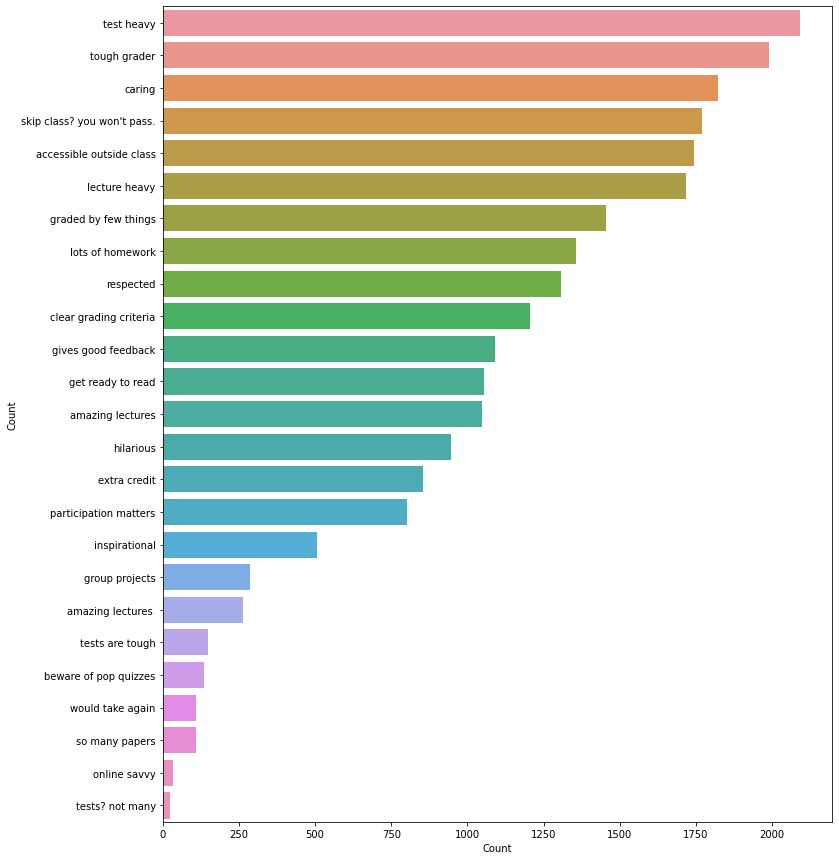

In [90]:
# frequency of the tags
g = tags_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y="Tag") 
ax.set(ylabel = 'Count') 
plt.show()
# maybe make 1000 the baseline (get 10 labels that work really well)

In [128]:
# do data cleaning
labeled_data = reviews[reviews['combined'].map(lambda l: len(l)) > 0] # take only those that have one tag
type(labeled_data['comment'])
comments_list = process_text(labeled_data['comment'])
len(comments_list)

8999

In [92]:
def process_text(df_col):
  comments_list = [str(x).lower() for x in df_col.tolist()]
  comments_list = [clean_text(word, puncts=True, stopwords=False) for word in comments_list] # prob dont stem or remove stopwords
  return comments_list

In [93]:
comments_list[:10]

['aaron is a great professor show up to class participate and turn in assignments and youre good',
 'this class teaches you about real world business aaron brings in guest speakers from different aspects of business which is super interesting i throughly enjoyed this class which is rare',
 'very applicable to life definitely worth taking',
 'the best class anyone at pitt can take so many life lessons learned and so much real world experience this class should be required great professor better content take him',
 'aaron is one of my favorite professors i have taken in college he brings in real work practices into class which is hard to find he brings in great guest speakers to help teach different dynamics to the class',
 'take aaron for any marketing elective his class is laidback but he brings in great people with valuable lessons',
 'aaron truly does care about what his students get out of his classes he brings in guest speakers to give professional business perspectives in both the

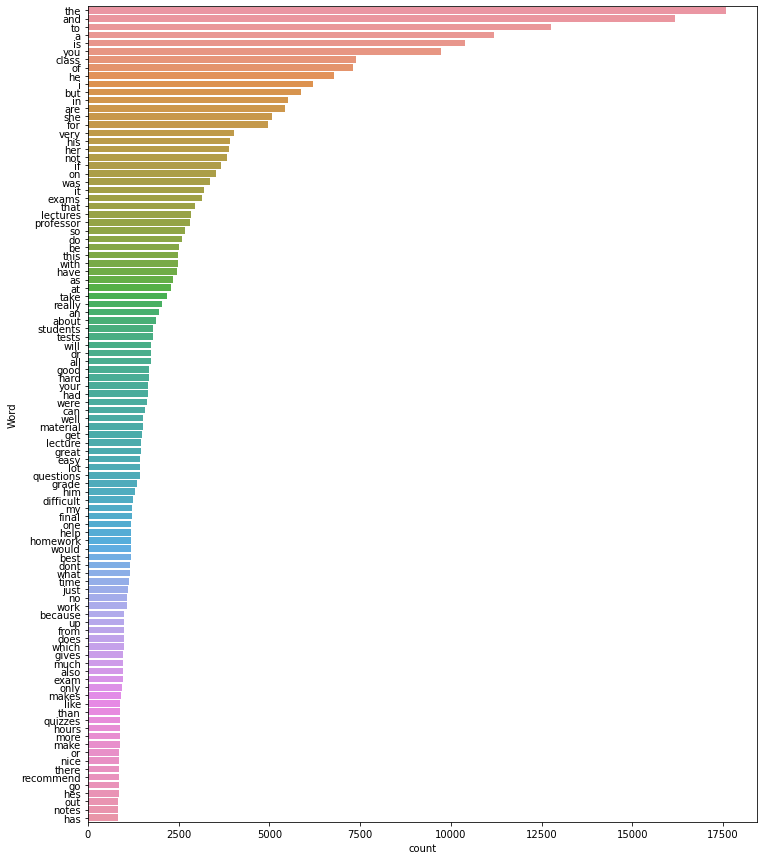

In [94]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(comments_list, 100)

In [95]:
# convert text to features
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(labeled_data['combined'])

target_variables = multilabel_binarizer.transform(labeled_data['combined'])

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [97]:
comments_list[:10]

['aaron is a great professor show up to class participate and turn in assignments and youre good',
 'this class teaches you about real world business aaron brings in guest speakers from different aspects of business which is super interesting i throughly enjoyed this class which is rare',
 'very applicable to life definitely worth taking',
 'the best class anyone at pitt can take so many life lessons learned and so much real world experience this class should be required great professor better content take him',
 'aaron is one of my favorite professors i have taken in college he brings in real work practices into class which is hard to find he brings in great guest speakers to help teach different dynamics to the class',
 'take aaron for any marketing elective his class is laidback but he brings in great people with valuable lessons',
 'aaron truly does care about what his students get out of his classes he brings in guest speakers to give professional business perspectives in both the

In [129]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(comments_list, target_variables, test_size=0.2, random_state=9)

In [130]:
target_variables

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [131]:
# create TF-IDF features (term freq * inverse document freq)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [132]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [133]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [134]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [135]:
#type(y_pred)
multilabel_binarizer.inverse_transform(y_pred)[9]
count_not_labeled = 0
count_labeled = 0
for i, a in enumerate(y_pred):
  pred = multilabel_binarizer.inverse_transform(y_pred)[i]
  if len(pred) > 0:
    #print(pred)
    count_labeled += 1
  else:
    count_not_labeled += 1

In [136]:
print(count_not_labeled) # with .5 thresh
print(count_labeled)

1310
490


In [137]:
f1_score(yval, y_pred, average="micro")

0.13390049935269097

In [138]:
y_pred_prob = clf.predict_proba(xval_tfidf)


t = 0.2 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)


# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.41058833291843

In [139]:
def infer_tags(q):
    q = clean_text(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = (clf.predict_proba(q_vec) >= 0.2).astype(bool)
    return multilabel_binarizer.inverse_transform(q_pred)

In [140]:
infer_tags("this class sucked, was very lecture heavy. teacher requires attendence, i would not recommend. super inspirational and caring but lots of homework. respected")

[('caring', 'lots of homework', 'respected')]

In [141]:
new_reviews = reviews.copy()

In [143]:
count = 0
result = []
cleaned = process_text(reviews['comment']) 
print(cleaned[:10])
for i, row in enumerate(reviews['combined']):
  if row == []:
    count+=1 
    inferred = infer_tags(cleaned[i])
    result.append((i,inferred))
    new_reviews['combined'][i] = inferred # replace

# 20938 unlabeled in original data

['worst professor i have ever had does not listen to anybody and always has to be right extremely rude to students and acts prejudiced do not take this class', 'professor berrian refuses to hear anyones opinions other than her own she wont acknowledge that she is wrong even when its proven that she is and she speaks to you like an idiot if you disagree with her she also grades only on grammar regardless of the content of the assignment dont take a class with her unless you have to', 'at first i was skeptical about her but she is a very knowledgeable women and if you do the readings and participate in discussion youre golden she challenged me like no other teacher has and to her im thankful dont expect an easy a go to class pay attention and do your work and youre good to go', 'class content was interesting she is my least favorite professor at the university of pittsburgh she is arrogant and not willing to take the time to actually listen to the students she grades for participation bu

<ipython-input-143-92e71b353bfd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reviews['combined'][i] = inferred # replace


In [145]:
count

20938

In [146]:
result[:10]

[(0,
  [('graded by few things',
    'lecture heavy',
    "skip class? you won't pass.",
    'test heavy',
    'tough grader')]),
 (1, [('tough grader',)]),
 (2, [('caring', 'get ready to read', 'participation matters')]),
 (3, [('participation matters', 'tough grader')]),
 (4, [('caring', 'get ready to read', 'respected')]),
 (5, [('respected',)]),
 (6,
  [('graded by few things', "skip class? you won't pass.", 'tough grader')]),
 (7, [()]),
 (8, [('get ready to read', 'lecture heavy', 'test heavy', 'tough grader')]),
 (9, [('graded by few things', 'lecture heavy', 'tough grader')])]

In [151]:
new_reviews.head()

,id,prof_id,emotion,comment,timestamp,course,thumbs_up,thumbs_down,quality,difficulty,...,meta_item2,meta_item3,meta_item4,meta_item5,tag0,tag1,tag2,tag3,tag4,combined
0,1b3d723a-ba04-11ed-8681-a4c3f0856cc6,1b381a70-ba04-11ed-b771-a4c3f0856cc6,awful,Worst professor I have ever had. Does not list...,"Apr 6th, 2014",AFR0242,0.0,0.0,1.0,5.0,...,Textbook: No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(graded by few things, lecture heavy, skip cl..."
1,1b3e5c10-ba04-11ed-bf24-a4c3f0856cc6,1b381a70-ba04-11ed-b771-a4c3f0856cc6,awful,Professor Berrian refuses to hear anyone's opi...,"Mar 4th, 2014",AFRCNA1655,1.0,0.0,1.5,3.0,...,Textbook: No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(tough grader,)]"
2,1b3f1f68-ba04-11ed-805a-a4c3f0856cc6,1b381a70-ba04-11ed-b771-a4c3f0856cc6,awesome,"At first I was skeptical about her, but she is...","Dec 20th, 2012",AFRCN1644,0.0,0.0,4.5,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(caring, get ready to read, participation mat..."
3,1b3f9482-ba04-11ed-930b-a4c3f0856cc6,1b381a70-ba04-11ed-b771-a4c3f0856cc6,average,Class content was interesting. She is my least...,"Oct 2nd, 2012",WSP0242,0.0,0.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(participation matters, tough grader)]"
4,1b4030de-ba04-11ed-a97a-a4c3f0856cc6,1b381a70-ba04-11ed-b771-a4c3f0856cc6,average,I was very hesitant to take this class after r...,"Nov 15th, 2011",AFRCN0242,0.0,0.0,3.5,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(caring, get ready to read, respected)]"


In [152]:
from google.colab import files
new_reviews.to_csv('new_reviews.csv', encoding = 'utf-8-sig') 
files.download('new_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>